In [69]:
# read in and examine data
import pandas as pd

timeserie_df = pd.read_csv("timeseries.csv")

# fixing the index
timeserie_df = timeserie_df.set_index("time")
timeserie_df.index = pd.to_datetime(timeserie_df.index)

timeserie_df.head()

,ATT__avg_cust_sent,ATT__cust_sent_improvement,ATT__comp_resp_timehrs,ATT__issue_was_resolved,BoostCare__avg_cust_sent,BoostCare__cust_sent_improvement,BoostCare__comp_resp_timehrs,BoostCare__issue_was_resolved,TMobileHelp__avg_cust_sent,TMobileHelp__cust_sent_improvement,...,VerizonSupport__comp_resp_timehrs,VerizonSupport__issue_was_resolved,sprintcare__avg_cust_sent,sprintcare__cust_sent_improvement,sprintcare__comp_resp_timehrs,sprintcare__issue_was_resolved,indavg__issue_was_resolved,indavg__avg_cust_sent,indavg__cust_sent_improvement,indavg__comp_resp_timehrs
time,,,,,,,,,,,,,,,,,,,,,
2017-10-05 01:00:00,-0.240121,-0.073483,127.366926,0.147465,-0.147979,-0.194545,12.188163,0.124167,-0.180056,-0.145045,...,215.027747,0.144137,-0.218992,-0.134986,118.042006,0.155786,0.180541,-0.171887,-0.074546,111.041849
2017-10-05 02:00:00,-0.240705,-0.073566,127.452215,0.147882,-0.148063,-0.194628,12.198046,0.125417,-0.180083,-0.144584,...,215.028550,0.144762,-0.219508,-0.135284,118.042247,0.156381,0.181268,-0.172144,-0.074439,111.051205
2017-10-05 03:00:00,-0.241517,-0.074128,127.503188,0.148090,-0.147896,-0.194462,12.211114,0.127083,-0.180302,-0.144525,...,215.028822,0.144762,-0.220445,-0.135254,118.047464,0.156679,0.182124,-0.172426,-0.074394,111.058236
2017-10-05 04:00:00,-0.242559,-0.075170,127.519845,0.148090,-0.147479,-0.194045,12.227365,0.129167,-0.180813,-0.144492,...,215.028955,0.145456,-0.221357,-0.135463,118.049308,0.156679,0.182840,-0.172841,-0.074201,111.063357
2017-10-05 05:00:00,-0.243913,-0.074128,127.534111,0.148090,-0.147063,-0.193628,12.241876,0.131250,-0.181163,-0.143803,...,215.029076,0.147123,-0.222607,-0.136713,118.049532,0.156679,0.183766,-0.173280,-0.073748,111.070280


<IPython.core.display.Javascript object>


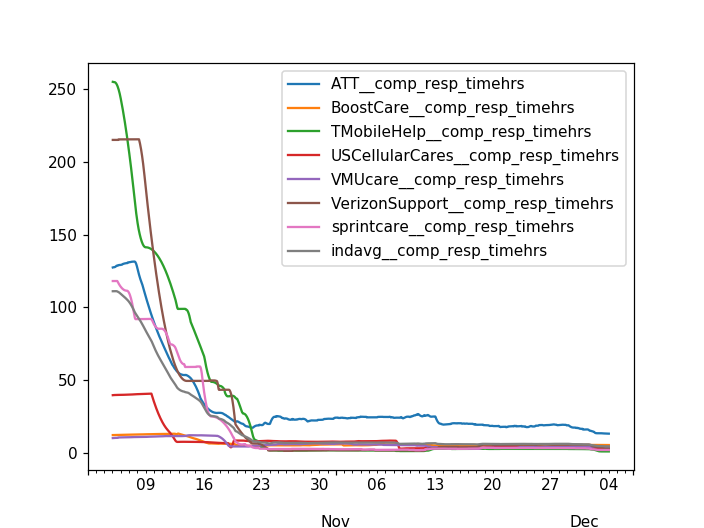

In [70]:
%matplotlib notebook

timeserie_df.plot(y = [c for c in timeserie_df 
                       if "comp_resp_timehrs" in c])

In [71]:
## getting the company names

comp_df = pd.read_csv("companies.csv")
compnames = comp_df["company_name"].values
compnames

array(['Sprint', 'US Cellular', 'Virgin Mobile', 'AT&T', 'Boost Mobile',
       'T-Mobile', 'Verizon'], dtype=object)

In [96]:
comp_df

,twitter_handle,industry,company_name
0,sprintcare,mobile_service,Sprint
1,USCellularCares,mobile_service,US Cellular
2,VMUcare,mobile_service,Virgin Mobile
3,ATT,mobile_service,AT&T
4,BoostCare,mobile_service,Boost Mobile
5,TMobileHelp,mobile_service,T-Mobile
6,VerizonSupport,mobile_service,Verizon


In [191]:
## use bokeh for interactive results (bar charts, graphs)
# loading modules

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, \
    push_notebook
output_notebook()

Loading BokehJS ...

In [209]:
# lookup tables
metric_props = {
    "issue_was_resolved": {"name": "RESOLUTION RATE"},
    "cust_sent_improvement": {"name": "CUST. SENTIMENT RISE"}
    }

histstr2timedel_d = {
    "2 weeks": pd.Timedelta(days = 14),
    "2 months": pd.Timedelta(days = 70),
    }

In [203]:
# bar chart
from bokeh.palettes import Spectral6

def get_metric_bar(metric, comp, ts_df):
    
    # get the averages
    ts_met = ts_df[[c for c in list(ts_df) if metric in c]]
    met_avgs = ts_met.values.mean(axis = 0)
    met_avg_ser = pd.Series(met_avgs, index = list(ts_met))


    # company twitter handle
    comp_th = comp_df[
        comp_df["company_name"] == comp    
        ]["twitter_handle"].iloc[0]

    # get mets for comp, ind, top
    comp_met = met_avg_ser[comp_th + "__" + metric]
    ind_met = met_avg_ser["indavg__" + metric]
    top_comp = met_avg_ser.idxmax()
    tc_met = met_avg_ser[top_comp]

    # get top company name
    tc_th = top_comp[None:top_comp.index("__")]
    tc_name = comp_df[
        comp_df["twitter_handle"] == tc_th
        ]["company_name"].iloc[0]

    xlabels = [comp, "Ind. avg.", tc_name]
    ys = np.array([comp_met, ind_met, tc_met])
    colors = Spectral6

    p = figure(title = metric_props[metric]["name"] + " (avg. perf.)",
               x_range = xlabels, 
               plot_width = 300, plot_height = 200,
              )

    source = ColumnDataSource(data={"xlabels": xlabels, "ys": ys, "colors": ["blue", "gray", "red"]})
    p.vbar(source = source, x = "xlabels", top = "ys", color = "colors", width = 0.2)
    
    return p

show(get_metric_bar(metric, comp, ts_trunc_df))

In [205]:
# function to get figures

def get_metric_timeplot(metric, comp, ts_df):

    p = figure(title = "Performance with time",
            x_axis_type="datetime", 
            plot_width = 300, plot_height = 200)

    # company twitter handle
    comp_th = comp_df[
        comp_df["company_name"] == comp    
        ]["twitter_handle"].iloc[0]

    r_comp = p.line(x = ts_df.index, 
                y = ts_df[comp_th + "__" + metric],
                )

    r_avg = p.line(x = ts_df.index, 
                y = ts_df["indavg__" + metric],
                color = "gray", alpha = 0.7,
                )
    
    return p

show(get_metric_timeplot(metric, comp, ts_trunc_df))

In [231]:
## use bokeh for interactive results (bar charts, graphs)
from bokeh.models import ColumnDataSource, Legend
from bokeh.layouts import row, column
from ipywidgets import interact
import numpy as np
from bokeh.models.widgets import PreText

# options. these will be added interactively later
comp = "Verizon"
histstr = "2 months"
#-------------------------------------

# keeping only relevant times
ts_trunc_df = timeserie_df.loc[
    timeserie_df.index[-1] - histstr2timedel_d[histstr] 
    : None]

def get_met_block(metric, comp, ts_trunc_df):
    met_timeplot = get_metric_timeplot(metric, comp, ts_trunc_df)
    met_bar = get_metric_bar(metric, comp, ts_trunc_df)
    layout = column(met_bar, met_timeplot)
    return layout
    
improvement_block = get_met_block("cust_sent_improvement", comp, ts_trunc_df)
resolution_block = get_met_block("issue_was_resolved", comp, ts_trunc_df)

blocks = row(resolution_block, improvement_block)

show(blocks, notebook_handle=True)

In [234]:


# options. these will be added interactively later
comp = "AT&T"
histstr = "2 months"
#-------------------------------------

# keeping only relevant times
ts_trunc_df = timeserie_df.loc[
    timeserie_df.index[-1] - histstr2timedel_d[histstr] 
    : None]

def get_met_block(metric, comp, ts_trunc_df):
    met_timeplot = get_metric_timeplot(metric, comp, ts_trunc_df)
    met_bar = get_metric_bar(metric, comp, ts_trunc_df)
    layout = column(met_bar, met_timeplot)
    return layout
    
improvement_block = get_met_block("cust_sent_improvement", comp, ts_trunc_df)
resolution_block = get_met_block("issue_was_resolved", comp, ts_trunc_df)

blocks = row(resolution_block, improvement_block)

show(blocks, notebook_handle=True)